# Exploration and Analysis of the NYPD Sexual Assault Arrest Data

* **NYPD_Arrests_Data_Historic_CLEAN_SA.csv** - This dataset contains all sexual assault related arrests made by the New York City Police Department from 2006 to the end of last year (2019). 

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
NYC_SA_arrests_df = pd.read_csv('../data/clean/NYPD_Arrests_Data_Historic_CLEAN_SA.csv')

In [3]:
NYC_SA_arrests_df.shape

(22479, 10)

This dataset has 22,479 rows and 10 columns. We can conclude that there have been **22,479 sexual assault related arrests in NYC since 2006.**

In [4]:
NYC_SA_arrests_df.sample(10)

,Unnamed: 0,arrest_date,arrest_borough,arrest_precinct,classif_code,offense_desc,pd_desc,perp_age,perp_sex,perp_race
14013,14013,12/30/2018,K,84,104,RAPE,RAPE 3,25-44,M,BLACK
9630,9630,11/07/2006,B,45,116,SEX CRIMES,SODOMY 3,<18,M,WHITE HISPANIC
11919,11919,04/30/2019,S,120,104,RAPE,RAPE 1,25-44,M,BLACK
4831,4831,05/02/2011,K,84,116,SEX CRIMES,SEXUAL ABUSE 1,25-44,M,BLACK HISPANIC
6090,6090,07/30/2010,B,44,104,RAPE,RAPE 3,25-44,M,BLACK HISPANIC
8839,8839,04/03/2007,B,41,104,RAPE,RAPE 1,25-44,M,BLACK
16098,16098,12/15/2016,Q,112,104,RAPE,RAPE 1,25-44,M,WHITE HISPANIC
3744,3744,01/16/2012,S,120,104,RAPE,RAPE 3,25-44,M,WHITE HISPANIC
2149,2149,01/30/2013,Q,112,104,RAPE,RAPE 1,25-44,M,WHITE HISPANIC
2357,2357,10/25/2012,M,25,116,SEX CRIMES,SODOMY 2,18-24,F,BLACK


Convert arrest_date into datetime format

In [5]:
NYC_SA_arrests_df['arrest_date']= pd.to_datetime(NYC_SA_arrests_df['arrest_date'])
del NYC_SA_arrests_df['Unnamed: 0']

#### When was the first sexual assault related arrest? (from 2006-2019)

In [6]:
NYC_SA_arrests_df.min()['arrest_date']

Timestamp('2006-01-02 00:00:00')

**The first sexual assault arrest occurred on January 2nd, 2006.**

## How have the number of sexual assault arrests changed from 2006-2019?
1. Make an arrest_year column from arrest_date that contains only the year
2. Use .groupby to group the number of arrests that occurred each year
3. Create a bar plot showing the number of arrests that occurred each year since 2006

In [7]:
NYC_SA_arrests_df['arrest_year'] = NYC_SA_arrests_df['arrest_date'].dt.year

In [8]:
NYC_SA_arrests_df['arrest_year'].value_counts()

2006    2028
2007    1889
2008    1780
2010    1769
2019    1685
2009    1647
2011    1584
2012    1571
2018    1537
2014    1437
2016    1432
2015    1409
2013    1404
2017    1307
Name: arrest_year, dtype: int64

Text(0.5, 1.0, 'Number of Sexual Assault Arrests in NYC from 2006-2019')

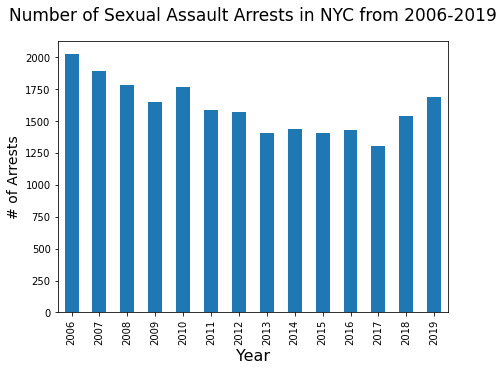

In [9]:
NYC_SA_arrests_df.groupby('arrest_year').size()
NYC_SAarrests_year = NYC_SA_arrests_df.groupby('arrest_year').size()
NYC_SAarrests_year.plot(kind='bar', figsize=(7, 5))
plt.xlabel('Year', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of Sexual Assault Arrests in NYC from 2006-2019', size=17, pad=20)

**Overall, there has been a gradual decline in sexual assault arrests from 2006 to 2017, followed by a slight increase from 2017 to 2019.** Sexual assault arrests reached its lowest number in 2017 with 1,307 arrests, while the year with the most arrests was in 2006 with 2,028 arrests. 

### Are there any months when arrests are more common?
1. Make an arrest_month column from arrest_date that contains only the arrest month
2. Use .groupby to group the number of arrests that occurred during each month
3. Create a bar plot showing the number of arrests that have occurred within each month

In [10]:
NYC_SA_arrests_df['arrest_month'] = NYC_SA_arrests_df['arrest_date'].dt.month

In [11]:
NYC_SA_arrests_df.groupby('arrest_month').size()

arrest_month
1     1907
2     1741
3     2006
4     1941
5     2119
6     1979
7     2007
8     2065
9     1761
10    1897
11    1587
12    1469
dtype: int64

Text(0.5, 1.0, 'Number of Sexual Assault Arrests in NYC (2006-2019) by Month #')

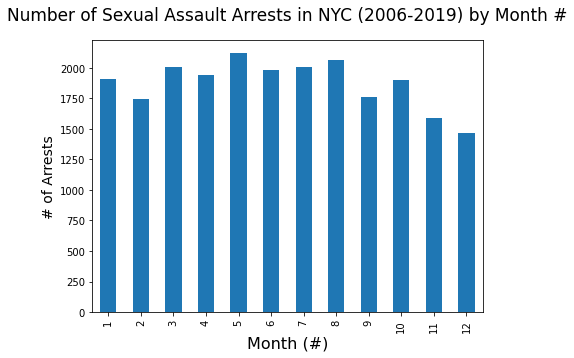

In [12]:
NYC_SA_arrests_df.groupby('arrest_month').size()
NYC_SAarrests_year = NYC_SA_arrests_df.groupby('arrest_month').size()
NYC_SAarrests_year.plot(kind='bar', figsize=(7, 5))
plt.xlabel('Month (#)', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of Sexual Assault Arrests in NYC (2006-2019) by Month #', size=17, pad=20)

Sexual assault arrests are relatively similar each month, but it seems they are **a little less common during the months of November and December.**

### Are there fluctuations in arrests when looking at the entire timeline from 2006-2019 by month?
1. Make an arrest_month_year column from arrest_date that contains the arrest month and year
2. Use .groupby to group the number of arrests that occurred during every month from 2006-2019
3. Create a bar plot showing the number of arrests that have occurred each month since 2006

In [13]:
NYC_SA_arrests_df['arrest_year_month'] = NYC_SA_arrests_df['arrest_date'].dt.to_period('M')

Text(0.5, 1.0, 'Number of Sexual Assault Arrests in NYC from 2006-2019 (monthly)')

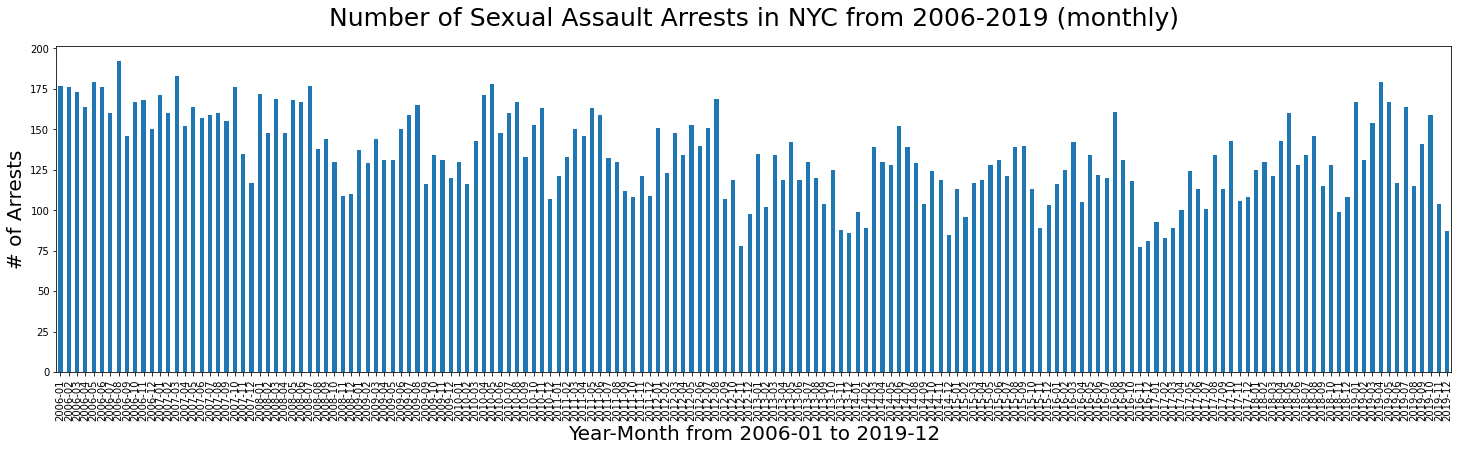

In [14]:
NYC_SA_arrests_df.groupby('arrest_year_month').size()
NYC_SAarrests_year = NYC_SA_arrests_df.groupby('arrest_year_month').size()
NYC_SAarrests_year.plot(kind='bar',figsize=(25, 6))
plt.xlabel('Year-Month from 2006-01 to 2019-12', size=20)
plt.ylabel('# of Arrests', size=20)
plt.title('Number of Sexual Assault Arrests in NYC from 2006-2019 (monthly)', size=25, pad=20)

This plot shows that the number of arrests do fluctuate during the year depending on the month. **Overall, the number of arrests are relatively lower during the winter months like December or January.**

### Which New York City boroughs have the most and least sexual assault arrests? 
1. Use value_counts to find the unique values in the columns
2. Rename borough letter with borough name
2. Create a bar plot

In [15]:
NYC_SA_arrests_df['arrest_borough'].value_counts()

K    6687
Q    5424
B    4928
M    4463
S     977
Name: arrest_borough, dtype: int64

In [16]:
NYC_SA_arrests_df['arrest_borough']= NYC_SA_arrests_df['arrest_borough'].replace({'K': 'BROOKLYN', 'Q': 'QUEENS', 'B': 'BRONX', 'M': 'MANHATTAN', 'S': 'STATEN ISLAND'})

Text(0.5, 1.0, 'Number of Sexual Assault Arrests (2006-2019) by NYC Borough')

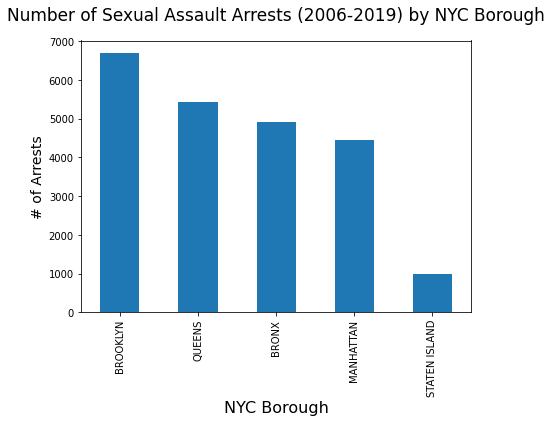

In [17]:
NYC_SA_arrests_df['arrest_borough'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('NYC Borough', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of Sexual Assault Arrests (2006-2019) by NYC Borough', size=17, pad=20)

**Brooklyn has the most sexual assault related arrests with 6,687 arrests, while Staten Island has the least with 977 arrests.**

### What are the different types of sexual assault related offenses among the arrests?
1. Use value_counts to find the count of unique values in the column
2. Create a bar plot

In [18]:
NYC_SA_arrests_df['offense_desc'].value_counts()

RAPE          11914
SEX CRIMES    10565
Name: offense_desc, dtype: int64

Text(0.5, 1.0, 'Number of SA Arrests (2006-2019) in NYC by Type of Offense')

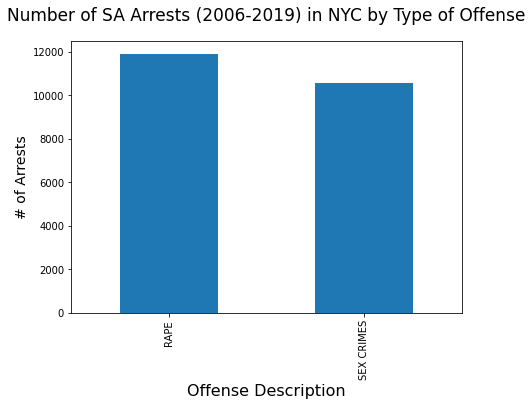

In [19]:
NYC_SA_arrests_df['offense_desc'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Offense Description', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of SA Arrests (2006-2019) in NYC by Type of Offense', size=17, pad=20)

Among the sexual assault related arrests, there are 2 types of offenses, **rape and sex crimes.** There are relatively equal numbers of rape and sex crime arrests, with **11,914 rape arrests and 10,565 sex crime arrests.**

### What are the specific offense classifications of the sexual assault arrests?
1. Use value_counts to find the count of each unique value in the columns
2. Create a bar plot

In [20]:
NYC_SA_arrests_df['pd_desc'].value_counts()

RAPE 1                                        7320
SEXUAL ABUSE 1                                4303
RAPE 3                                        2828
SODOMY 1                                      2560
RAPE 2                                        1766
OBSCENE MATERIAL - UNDER 17 YEARS OF AGE      1080
COURSE OF SEXUAL CONDUCT AGAINST A CHILD       843
SODOMY 3                                       616
SODOMY 2                                       379
SEXUAL ABUSE                                   326
OBSCENITY 1                                    230
OBSCENE MATERIAL - UNDER 17 YE                 146
COURSE OF SEXUAL CONDUCT AGAIN                  39
INCEST                                          16
AGGRAVATED SEXUAL ASBUSE                        15
SEX CRIMES                                       9
INCEST 3                                         2
FAC. SEXUAL OFFENSE W/CONTROLLED SUBSTANCE       1
Name: pd_desc, dtype: int64

Text(0.5, 1.0, 'Number of SA Arrests (2006-2019) in NYC by Type of Offense Classification')

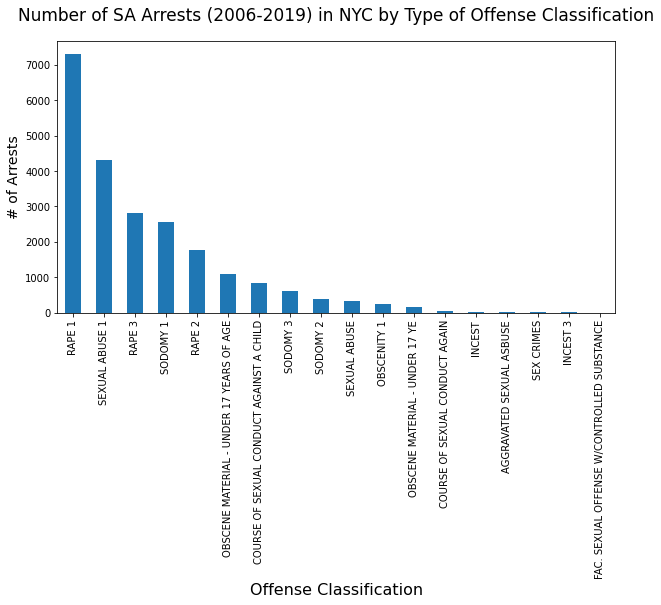

In [21]:
NYC_SA_arrests_df['pd_desc'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Offense Classification', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of SA Arrests (2006-2019) in NYC by Type of Offense Classification', size=17, pad=20)

**The most common classification among sexual assault arrests is Rape 1, followed by Sexual Abuse 1, and Rape 3.**

## What are the most common perpetrator demographics among the arrests?
1. Use value_counts to find the count of each unique value in the columns
2. Create a bar plot
3. Repeat for Age, Race, and Sex

### Sexual Assault Perpetrators by Age

In [22]:
NYC_SA_arrests_df['perp_age'].value_counts()

25-44    10347
18-24     5018
45-64     3860
<18       2795
65+        455
934          1
914          1
924          1
Name: perp_age, dtype: int64

**There seem to be values within the perpetrator age column that contain errors.**
1. Find the index of the rows containing victim age 934, 924, and 914.
2. Drop the rows and create a new subset

In [23]:
print(NYC_SA_arrests_df[NYC_SA_arrests_df['perp_age'] == '934'].index.values)
print(NYC_SA_arrests_df[NYC_SA_arrests_df['perp_age'] == '924'].index.values)
print(NYC_SA_arrests_df[NYC_SA_arrests_df['perp_age'] == '914'].index.values)

[8312]
[9015]
[8568]


In [24]:
NYC_SA_arrests_drop= NYC_SA_arrests_df.drop([8312, 9015, 8568])
NYC_SA_arrests_drop['perp_age'].value_counts()

25-44    10347
18-24     5018
45-64     3860
<18       2795
65+        455
Name: perp_age, dtype: int64

Create an age_order so the x-axis is organized in ascending age order

Text(0.5, 1.0, 'Number of SA Arrests (2006-2019) in NYC by Perpetrator Age Group')

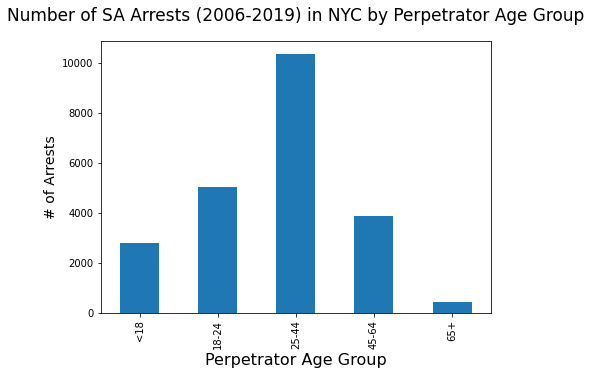

In [25]:
age_order = ['<18','18-24', '25-44', '45-64', '65+']
NYC_SA_arrests_drop['perp_age'].value_counts().loc[age_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Perpetrator Age Group', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of SA Arrests (2006-2019) in NYC by Perpetrator Age Group', size=17, pad=20)

The **most common perpetrator age group within the sexual assault arrests is the age group 25-44.** The least common is the age group 65+. 

### Sexual Assault Perpetrators by Race
1. Use value_counts to find the count of each unique value in the columns
2. Create a bar plot

In [26]:
NYC_SA_arrests_df['perp_race'].value_counts()

BLACK                             9354
WHITE HISPANIC                    7555
BLACK HISPANIC                    2145
WHITE                             2014
ASIAN / PACIFIC ISLANDER          1105
UNKNOWN                            243
AMERICAN INDIAN/ALASKAN NATIVE      54
OTHER                                9
Name: perp_race, dtype: int64

Text(0.5, 1.0, 'Number of SA Arrests (2006-2019) in NYC by Perpetrator Race')

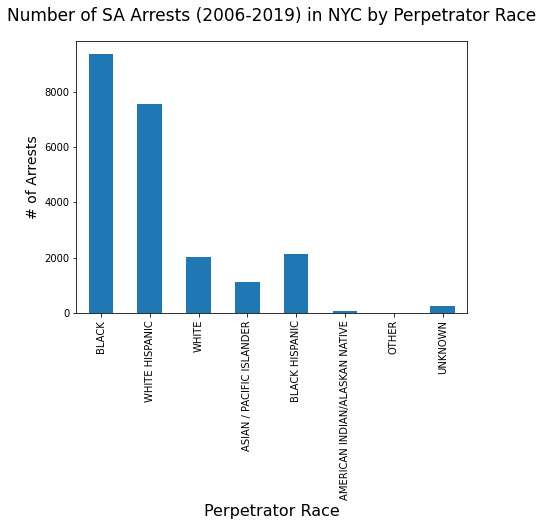

In [27]:
race_order = ['BLACK', 'WHITE HISPANIC', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER', 'UNKNOWN']
NYC_SA_arrests_df['perp_race'].value_counts().loc[race_order].plot(kind='bar', figsize=(7, 5))
plt.xlabel('Perpetrator Race', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of SA Arrests (2006-2019) in NYC by Perpetrator Race', size=17, pad=20)

**The two most common race among perpetators are Black and White Hispanics.**

### Sexual Assault Perpetrators by Sex
1. Use value_counts to find the unique values in the columns
2. Create a bar plot

In [28]:
NYC_SA_arrests_df['perp_sex'].value_counts()

M    21885
F      594
Name: perp_sex, dtype: int64

Text(0.5, 1.0, 'Number of SA Arrests (2006-2019) in NYC by Perpetrator Sex')

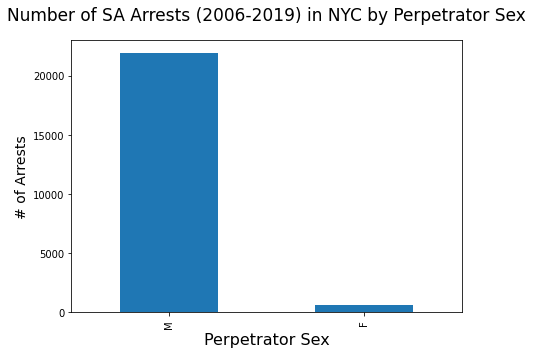

In [29]:
NYC_SA_arrests_df['perp_sex'].value_counts().plot(kind='bar', figsize=(7, 5))
plt.xlabel('Perpetrator Sex', size=16)
plt.ylabel('# of Arrests', size=14)
plt.title('Number of SA Arrests (2006-2019) in NYC by Perpetrator Sex', size=17, pad=20)

Arrested sexual assault perpetrators have been overwhelmingly individuals who identify as males. **Among the 22,479 sexual assault related arrests made by the NYPD from 2006-2019, 97.4% of them had male perpetrators.**